## Latent Semantic Analysis (LSA)

The LSA is a dimension reduction technique that can be used to uncover common topics in a corpus of text documents.


In [10]:
import pandas as pd
import re
import nltk
nltk.download('reuters')

from nltk.corpus import reuters
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

[nltk_data] Downloading package reuters to /home/amarov/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


In [11]:
reuters.categories()


['acq',
 'alum',
 'barley',
 'bop',
 'carcass',
 'castor-oil',
 'cocoa',
 'coconut',
 'coconut-oil',
 'coffee',
 'copper',
 'copra-cake',
 'corn',
 'cotton',
 'cotton-oil',
 'cpi',
 'cpu',
 'crude',
 'dfl',
 'dlr',
 'dmk',
 'earn',
 'fuel',
 'gas',
 'gnp',
 'gold',
 'grain',
 'groundnut',
 'groundnut-oil',
 'heat',
 'hog',
 'housing',
 'income',
 'instal-debt',
 'interest',
 'ipi',
 'iron-steel',
 'jet',
 'jobs',
 'l-cattle',
 'lead',
 'lei',
 'lin-oil',
 'livestock',
 'lumber',
 'meal-feed',
 'money-fx',
 'money-supply',
 'naphtha',
 'nat-gas',
 'nickel',
 'nkr',
 'nzdlr',
 'oat',
 'oilseed',
 'orange',
 'palladium',
 'palm-oil',
 'palmkernel',
 'pet-chem',
 'platinum',
 'potato',
 'propane',
 'rand',
 'rape-oil',
 'rapeseed',
 'reserves',
 'retail',
 'rice',
 'rubber',
 'rye',
 'ship',
 'silver',
 'sorghum',
 'soy-meal',
 'soy-oil',
 'soybean',
 'strategic-metal',
 'sugar',
 'sun-meal',
 'sun-oil',
 'sunseed',
 'tea',
 'tin',
 'trade',
 'veg-oil',
 'wheat',
 'wpi',
 'yen',
 'zinc']

In [12]:
housing_fileids = reuters.fileids(["housing"])
income_fileids = reuters.fileids(["income"])
heating_fileids = reuters.fileids(["heat"])

housing_text = reuters.raw(fileids=housing_fileids).split("\n\n")
income_text = reuters.raw(fileids=income_fileids).split("\n\n")
heating_text = reuters.raw(fileids=heating_fileids).split("\n\n")

texts = housing_text + income_text + heating_text
topics = ["housing"] * len(housing_text) + ["income"] * len(income_text) + ["heating"] * len(heating_text)

len(texts)

67

In [13]:
texts[1]

'INTEREST RATES HURT U.S. MAY HOUSING SALES\n  Sales of new single-family homes\n  tumbled 14.9 pct in May from April levels because of higher\n  mortgage interest rates, analysts said.\n      "There should be another month or two of very weak new home\n  sales but with interest rates stabilizing, sale of new homes\n  should become more stable by mid-summer," said economist\n  Lawrence Chimerine of Wharton Econometrics Inc.\n      The drop in May, to a seasonally adjusted annual rate of\n  616,000 units, was the largest since January 1982, the Commerce\n  Department said.\n      Interest rates on conventional mortgages bottomed out at\n  about 9.08 pct in March and rose to about 10.7 pct in April,\n  according to Stephen Roach, economist at Morgan Stanley.\n      The effect was to freeze some potential new homebuyers out\n  of the market, he and others said.\n      "The rates moved very suddenly and were certainly\n  unexpected by homebuyers," said Cynthia Latta, an economist\n  with D

In [14]:
# We will remove the numbers from the text, because here these are very common in every article and obfuscate
# the results

texts = [re.sub("\d+", "", text) for text in texts]

tfidf = TfidfVectorizer(
    lowercase=True,
    stop_words="english",
    min_df=0.05
)
term_doc_matrix = tfidf.fit_transform(texts)

term_doc_df = pd.DataFrame(
    term_doc_matrix.toarray(),
    columns=tfidf.get_feature_names_out()
)

## Should probably remove numbers
term_doc_df.head()

,according,added,adjusted,ago,analysts,annual,april,area,average,bank,...,unchanged,underlying,unit,united,units,wage,week,year,years,york
0,0.056346,0.051617,0.000000,0.0,0.000000,0.041284,0.041284,0.0,0.080446,0.215250,...,0.000000,0.00000,0.000000,0.059343,0.040223,0.0,0.0,0.365551,0.059343,0.000000
1,0.058931,0.000000,0.037393,0.0,0.058931,0.043178,0.086356,0.0,0.000000,0.056281,...,0.000000,0.05196,0.000000,0.000000,0.042068,0.0,0.0,0.000000,0.000000,0.044364
2,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.219761,0.0,0.000000,0.042293,0.000000,0.0,0.000000,0.000000,...,0.044703,0.00000,0.043455,0.000000,0.453269,0.0,0.0,0.000000,0.000000,0.000000


In [15]:
term_doc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Columns: 202 entries, according to york
dtypes: float64(202)
memory usage: 105.9 KB


$$
A_{m\times n} = \mathbf{U}_{m \times m} \mathbf{\Sigma}_{m \times n} \mathbf{V}^T_{n \times n}
$$
Where $\mathbb{U}$ and $\mathbb{V}$ are orthogonal matrices.

$$
\mathbf{A} = \begin{pmatrix}
u_{11} & u_{12} & \cdots & u_{1m} \\
u_{21} & u_{22} & \cdots & u_{2m} \\
\vdots \\
u_{m1} & u_{m2} & \cdots & u_{mm} \\
\end{pmatrix}
\begin{pmatrix}
\sigma_1 & 0 & \cdots & 0 & 0\\
0 & \sigma_2 & \cdots & 0 & 0\\
0 & 0 & \ddots & \sigma_k & \vdots \\
0 & 0 & \cdots & 0 & \mathbf{0}_{n - k \times m - k}
\end{pmatrix}

\begin{pmatrix}
v_{11} & v_{12} & \cdots & v_{1n} \\
v_{21} & v_{22} & \cdots & v_{2n} \\
\vdots \\
v_{n1} & v_{m2} & \cdots & v_{nn} \\
\end{pmatrix}^T
$$

$$
\begin{align}
\mathbf{A} & = \begin{pmatrix}
u_{11} \\
u_{21} \\
\vdots\\
u_{m1}
\end{pmatrix}
\times \sigma_1 \times 
\begin{pmatrix}
v_{11} & v_{12} & \ldots & v_{1n}
\end{pmatrix} +  \\

& \begin{pmatrix}
u_{12} \\
u_{22} \\
\vdots\\
u_{m2}
\end{pmatrix}
\times \sigma_2 \times 
\begin{pmatrix}
v_{21} & v_{22} & \ldots & v_{2n}
\end{pmatrix} + \\
& \vdots \\
\end{align}
$$

You can think about matrix multiplication as a sum of outer products

$$
\begin{pmatrix}
0 & 1 \\
2 & 3
\end{pmatrix}
\begin{pmatrix}
a & b \\
c & d
\end{pmatrix}
= \begin{pmatrix}
0a & 0b \\
2a & 2b
\end{pmatrix}
+ 
\begin{pmatrix}
1c & 1d \\
3c & 3d
\end{pmatrix} = 
\begin{pmatrix}
0a + 1c & 0b + 1d \\
2a + 3c & 2b + 3d
\end{pmatrix}
$$

Using this you can write the singular value decomposition as a sum of outer products.

$$
\mathbf{A} = \sum_{i} \sigma_i \mathbf{u}_i\mathbf{v}_i^T
$$

While the outer products represent directions, you can think about the singular values as describing the _importance_ of these directions.

Some of the terms in the sum contribute less to A, so dropping these from the sum results in a lower-rank (p) approximation of the matrix.

$$
\mathbf{A} \approx \sum_{i = 1}^{p} \sigma_i \mathbf{u}_i\mathbf{v}_i^T
$$




Example document-term matrix:

| Documents/Terms | house | oil  | wage |
|-----------------|-------|------|------|
| Doc1 (housing)  | 1.43  | 0.02 | 0.3  |
| Doc2 (income)   | 0.4   | 0.01 | 1.2  |
| Doc3 (heat)     | 0.35  | 1.7  | 0.04 |

Example terms-topic matrix: values indicate how strongly a word is related to a topic.

| Word/Topic | housing | income | heat |
|------------|---------|--------|------|
| house      | 1.43    | 0.022  | 0.34 |
| wage       | 0.14    | 2.01   | 0.25 |
| oil        | 0.35    | 0.21   | 1.12 |

Example document-topic matrix: the values in this matrix indicate how strongly
a document is related to a topic.

| Document/Topic | housing | income | heat |
|----------------|---------|--------|------|
| Doc1 (housing) | 1.43    | 0.01   | 0.21 |
| Doc2 (income)  | 0.14    | 2      | 0.25 |
| Doc3 (heat)    | 0.38    | 0.21   | 1.17 |


The singular values indicate how strongly a topic contributes to explaining
the data (term-document frequencies).

| Topic   | singular value |
|---------|----------------|
| housing | 6.2            |
| wage    | 2.3            |
| oil     | 0.02           |


In [16]:
from sklearn.decomposition import TruncatedSVD

lsa = TruncatedSVD(n_components=3, n_iter=100, random_state=42)
lsa_result = lsa.fit_transform(term_doc_df)
Sigma = lsa.singular_values_
V_T = lsa.components_.T
V_T

array([[ 1.10156219e-02,  2.43982282e-02,  1.61363323e-03],
       [ 1.68306103e-02,  1.45461777e-03,  1.69189971e-02],
       [ 1.05488006e-01, -2.91553395e-02, -1.14195689e-01],
       [ 2.06903122e-02,  1.50899547e-03,  1.31938140e-02],
       [ 1.93665775e-02,  1.41184731e-02,  2.07468964e-03],
       [ 4.22589600e-02, -8.48312759e-03, -4.37299297e-02],
       [ 7.05348267e-02,  3.22548507e-02,  1.07232827e-01],
       [ 1.31378791e-02,  3.21920028e-02,  6.75154636e-04],
       [ 8.77853570e-02, -4.63507671e-03,  1.67233912e-01],
       [ 4.47924219e-02, -1.49157718e-03,  3.88844053e-02],
       [ 3.51364324e-02,  2.82534589e-01, -2.23862624e-02],
       [ 1.28842379e-02,  3.81546062e-02,  3.40036664e-03],
       [ 1.22422198e-02,  2.92266027e-02, -9.05972346e-03],
       [ 1.63592371e-02,  1.02111237e-02,  1.36255886e-02],
       [ 1.90902478e-02, -7.09486093e-03, -2.41722192e-02],
       [ 8.69480390e-02, -4.27456143e-03,  4.80298530e-02],
       [ 1.36905035e-02,  8.51098075e-02

<Axes: >

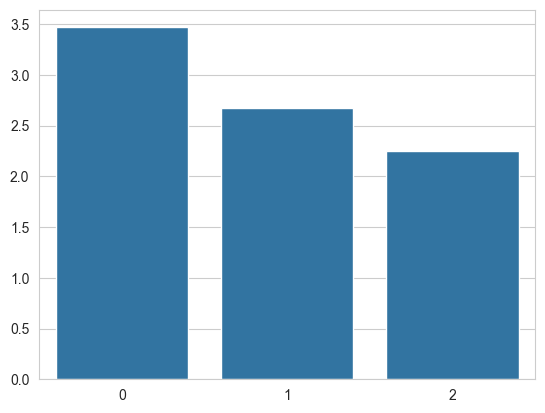

In [17]:
sns.barplot(x=list(range(len(Sigma))), y = Sigma)

In [18]:
term_topic_matrix = pd.DataFrame(data=V_T,
                                 index=term_doc_df.columns,
                                 columns = [f'Component {r}' for r in range(0,V_T.shape[1])])
term_topic_matrix

,Component 0,Component 1,Component 2
according,0.011016,0.024398,0.001614
added,0.016831,0.001455,0.016919
adjusted,0.105488,-0.029155,-0.114196
ago,0.020690,0.001509,0.013194
analysts,0.019367,0.014118,0.002075
...,...,...,...
wage,0.036213,-0.006499,0.067636
week,0.025413,0.038685,0.000160
year,0.159726,-0.026402,0.081362
years,0.013353,0.009191,0.008770


## Count Based Methods

A weakness of word2vec representations is that these fail to capture information about relationships like the following one, because it only relies on _local_ context.

An Idea: why not simply count how many times a word occurs close to another word. As in the case of word2vec we can 
create a sliding window of a fixed size and count how words occur together in that window. This will capture 
semantic and syntactic information.

"The car parked by the bank."

Is "The" special in the context of "car" or "bank"?

As word2vec, GloVe relies on a context window of fixed width to define a co-occurrence matrix of all tokens.

For example the sentence "The car parked by the bank." with a window size 1 will have the following co-occurrence matrix.


|        | The | car | parked | by  | bank |
|--------|-----|-----|--------|-----|------|
| The    | 0   | 1   | 0      | 1   | 1    |
| car    | 1   | 0   | 1      | 0   | 0    |
| parked | 0   | 1   | 0      | 1   | 0    |
| by     | 1   | 0   | 1      | 0   | 0    |
| bank   | 1   | 0   | 0      | 0   | 0    |

This matrix provides representations of the words in terms of co-occurrence. Howevere, there are several problems with this
representation.

- Sparse and high dimensional
- The size of the vectors is not fixed, because it dependes on the size of the vocabulary.

We can mitigate these problems by "compressing" the co-occurence vectors. How?


Instead of using SVD to reduce dimensionality, Pennington et al. (2014) propose to model the counts in the 
co-occurrence matrix using word representations. 

Pennington, J., Socher, R. and Manning, C. (2014) ‘Glove: Global Vectors for Word Representation’, in Proceedings of the 2014 Conference on Empirical Methods in Natural Language Processing (EMNLP). Proceedings of the 2014 Conference on Empirical Methods in Natural Language Processing (EMNLP), Doha, Qatar: Association for Computational Linguistics, pp. 1532–1543. Available at: https://doi.org/10.3115/v1/D14-1162.


The crucial idea of their research is to model **ratios** of conditional probabilities.

| Prob. and Prob. Ratio              | k = solid          | k = gas            | k = water          | k = random         |
|------------------------------------|--------------------|--------------------|--------------------|--------------------|
| P(k &#124; ice)                    | $2 \times 10^{-4}$ | $6\times 10^{-5}$  | $3 \times 10^{-3}$ | $2 \times 10^{-7}$ |
| P(k &#124; steam)                  | $2 \times 10^{-5}$ | $6 \times 10^{-4}$ | $3 \times 10^{-3}$ | $2 \times 10^{-7}$ |
| P(k &#124; ice) /P(k &#124; steam) | $10$               | $1/10$             | $1$                | $1$                |


Let $X_{ij}$ be the co-occurrence count of words $i$ and $j$. The number of occurrences of word $j$ is then $\sum_{j = 1}^{V} X_{ij}$.

The conditional frequency of observing word $i$ given word $j$ is

$$
P(j | i) = X(i,j) / X_{i} 
$$

They propose a log-linear model for the conditional probabilities

$$
w_i \cdot w_j = \log P(i|j) \\
$$


Therefore, the ratio log ratio of the probabilities equals the dot product of a context word vector and the difference between the two word vectors.

$$
\tilde{w}_k \cdot (w_i - w_j) = w_k \cdot w_i - w_k \cdot w_j = \log P(k|i) - \log P(k | j) 
$$

$$
\tilde{w}_k \cdot w_i = \log(X_{ik} / X_i) = \log X_{ik}- \log X_i
$$

The loss function of their model penalizes deviations between the dot product of a word and a context word representation

$$
J = \sum_{i,j = 1}^{V} f(X_{ij})(w_i \cdot \tilde{w_j} + b_i + \tilde{b}_j - \log X_{ij})^2
$$

where $F(X_{ij})$ is used to clip high counts, e.g. resulting from syntactic rules.
